In [1]:
# Import necessary libraries
from fnal import Dataset
from utilities import plot_planes, plot_crate, plot_tpc, plot_wire_planes, plot_waveform, plot_ffts, plot_planes_new

In [2]:
# Load the data and MC datasets
input_path = '/Users/mueller/data/noise/epoch0/'
data = [Dataset(f'/Users/mueller/data/noise/epoch0/run10265_new.root'), Dataset(f'/Users/mueller/data/montecarlo_rev2.root')]
labels = ['Run 10265 (Model Base)', 'Monte Carlo (Rev. 2)']

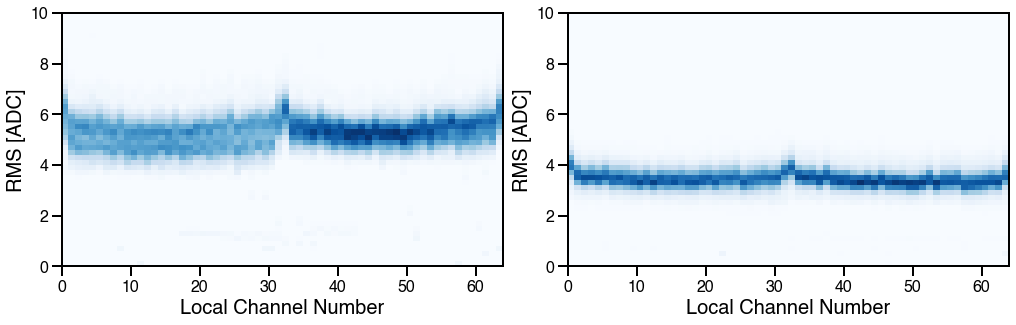

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from globals import *

def plot_board(dataset, metric, tpc=None, save_path=None) -> None:
    """
    Plots the desired metric for the specified TPC as a 2D histogram
    across the common readout board grouping.

    Parameters
    ----------
    dataset: Dataset
        The Dataset to be plotted.
    metric: str
        The name of the metric.
    tpc: int
        The index of the TPC to select and plot.
    save_path: str
        The full path specifying the location to save the plot.

    Returns
    -------
    None.
    """
    plt.style.use(PLOT_STYLE)
    figure = plt.figure(figsize=(14,6))
    gspec = figure.add_gridspec(16,2)
    haxs = [figure.add_subplot(gspec[2:13, p]) for p in [0,1]]
    wires = ['Induction 1', 'Standard']
    style = dataset.get_styling(metric)
    
    mask = dataset.get_mask(metric, tpc=tpc, plane=0, wired_only=True)
    haxs[0].hist2d(dataset['!local_id'][mask], dataset[metric][mask], bins=(64, style[2]), range=((0,64), style[1]), cmap='Blues')
    haxs[0].set_xlim(0,64)
    haxs[0].set_ylim(style[1])
    haxs[0].set_xlabel('Local Channel Number')
    haxs[0].set_ylabel(style[0])

    mask = dataset.get_mask(metric, tpc=tpc, plane=1, wired_only=True) | dataset.get_mask(metric, tpc=tpc, plane=2, wired_only=True)
    haxs[1].hist2d(dataset['!local_id'][mask], dataset[metric][mask], bins=(64, style[2]), range=((0,64), style[1]), cmap='Blues')
    haxs[1].set_xlim(0,64)
    haxs[1].set_ylim(style[1])
    haxs[1].set_xlabel('Local Channel Number')
    haxs[1].set_ylabel(style[0])

def plot_capacitance_correlation(dataset, metric, save_path=None) -> None:
    """
    Plots a 2D histogram of total channel capacitance and the desired
    metric.

    Parameters
    ----------
    dataset: Dataset
        The Dataset to be plotted.
    metric: str
        The name of the metric.
    save_path: str
        The full path specifying the location to save the plot.
    """
    plt.style.use(PLOT_STYLE)
    figure = plt.figure(figsize=(8,6))
    ax = figure.add_subplot()
    mask = dataset.get_mask(metric, wired_only=True)
    total_capacitance = dataset['wire_capacitance'][mask] + dataset['cable_capacitance'][mask]
    roi_mask = ((total_capacitance < 200) & (total_capacitance > 175))
    ax.scatter(total_capacitance, dataset[metric][mask], cmap='Blues')
    style = dataset.get_styling(metric)
    ax.set_xlim(0, 500)
    ax.set_ylim(style[1])
    ax.set_xlabel('Channel Capacitance [pF]')
    ax.set_ylabel(style[0])

plot_board(data[0], metric='!raw_rms')

In [4]:
df = data[0].median_noise_data
mask = df['group_id'] == 15
df[mask][['channel_id', 'raw_rms', 'int_rms', 'coh_rms']]

,channel_id,raw_rms,int_rms,coh_rms
800,800,5.364745,4.028948,2.529996
801,801,4.816446,3.843115,2.530527
802,802,4.775388,3.775370,2.530478
803,803,4.648759,3.609815,2.530527
804,804,4.385638,3.395877,2.530527
805,805,4.567047,3.614191,2.530647
806,806,4.557229,3.596229,2.530527
807,807,4.659316,3.630434,2.530478
808,808,4.466475,3.496441,2.530527
809,809,4.507647,3.503103,2.530527


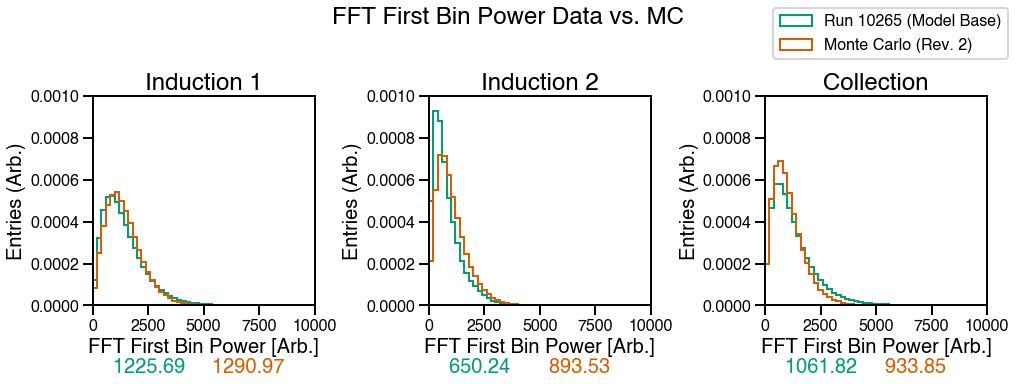

In [5]:
plot_planes_new(data, labels, '!fft_bin0', 'FFT First Bin Power Data vs. MC', normalize=True, cap=0.0010, wired_only=True)

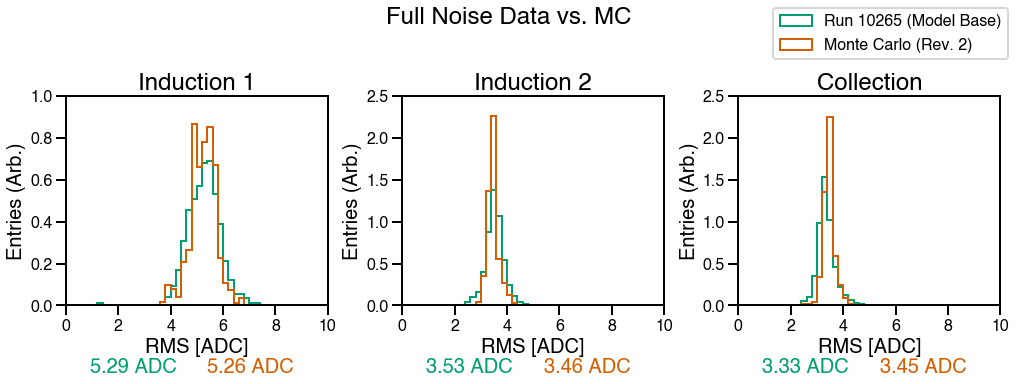

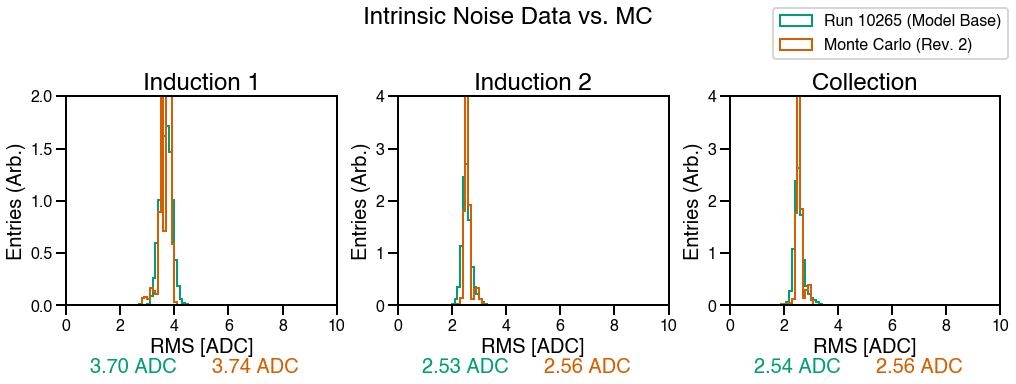

In [6]:
plot_planes_new(data, labels, 'raw_rms', 'Full Noise Data vs. MC', normalize=True, cap=[1, 2.5, 2.5], wired_only=True)
plot_planes_new(data, labels, 'int_rms', 'Intrinsic Noise Data vs. MC', normalize=True, cap=[2, 4, 4], wired_only=True)

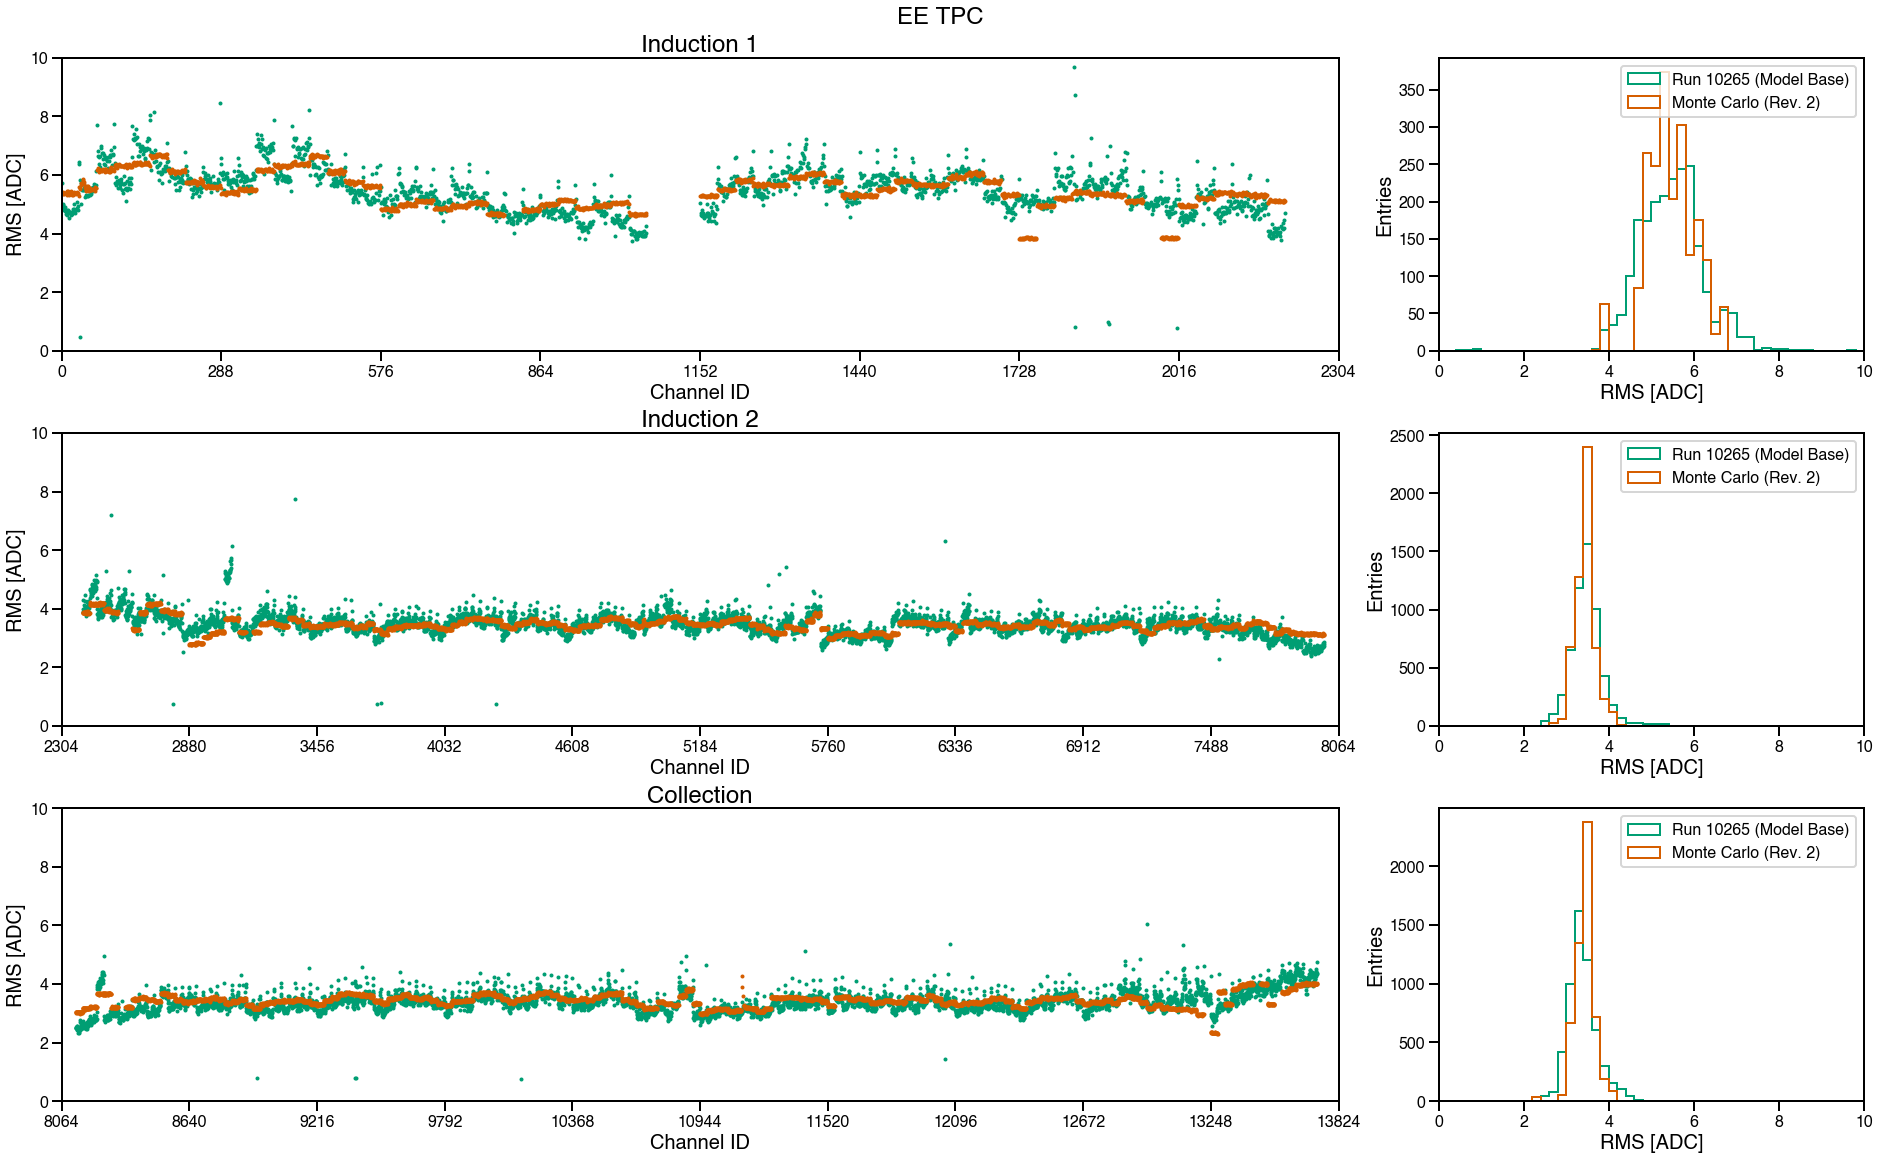

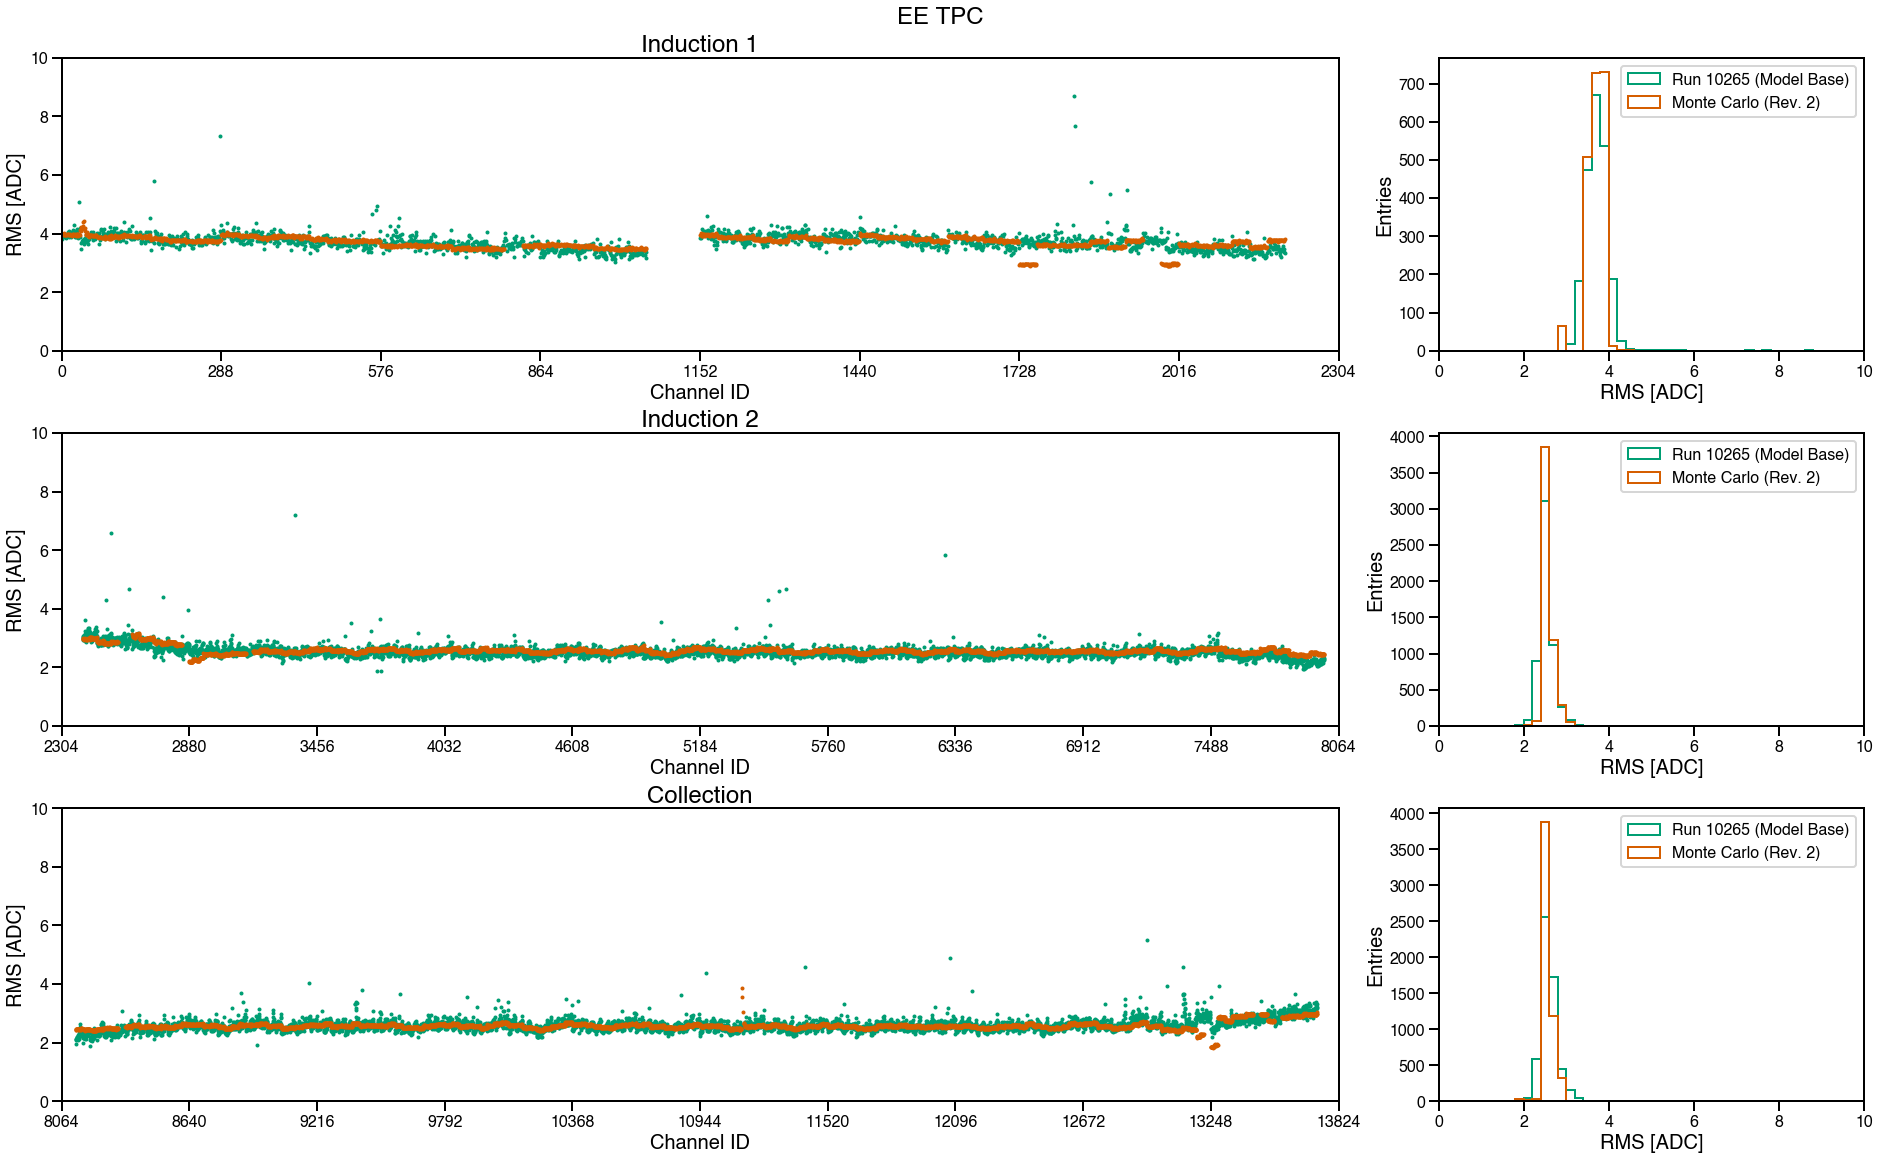

In [7]:
plot_tpc(data[:2], labels, metric='raw_rms', tpc=0, wired_only=True)
plot_tpc(data[:2], labels, metric='int_rms', tpc=0, wired_only=True)

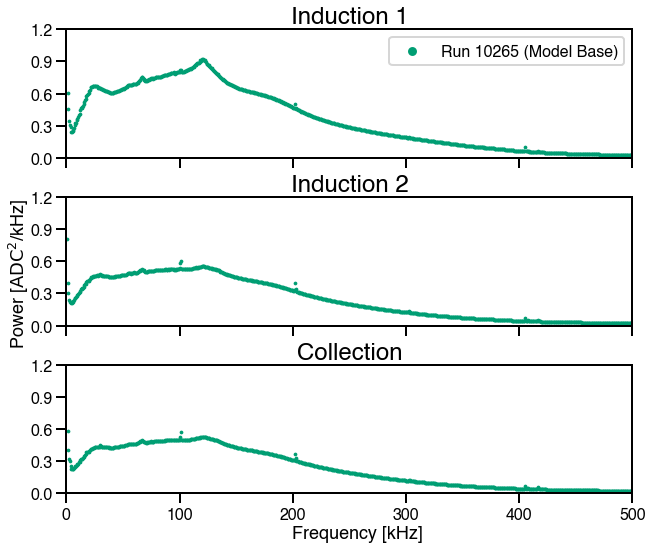

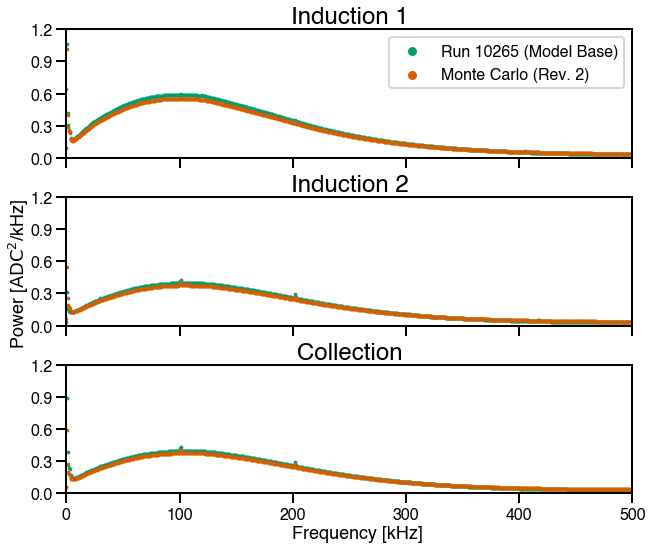

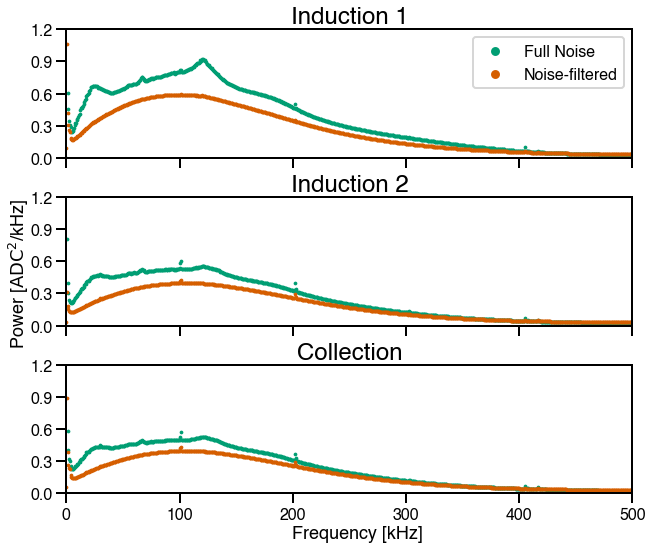

In [8]:
# Comparison of FFTs in data and MC.
plot_ffts(data[:1], labels, 'raw', save_path='/Users/mueller/data/signoise_plots/ffts_data_raw.pdf')
plot_ffts(data[:2], labels, 'int', save_path='/Users/mueller/data/signoise_plots/ffts_data_int.pdf')

fft_labels = ['Full Noise', 'Noise-filtered', 'Coherent']
plot_ffts(data[0], fft_labels, ['raw', 'int', 'coh'][:2])

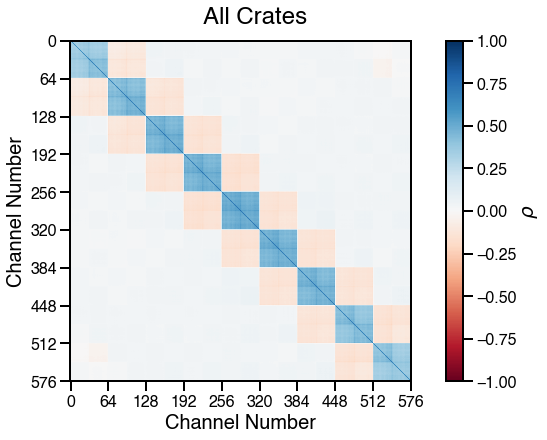

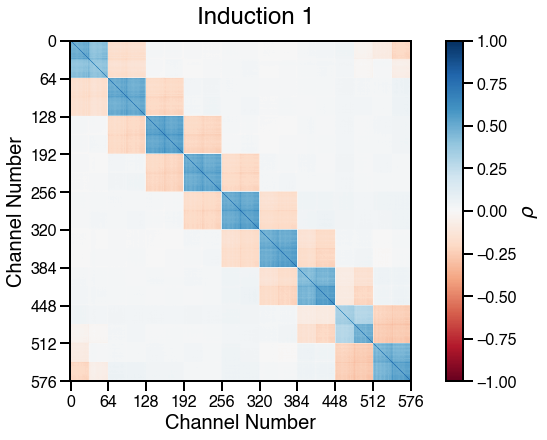

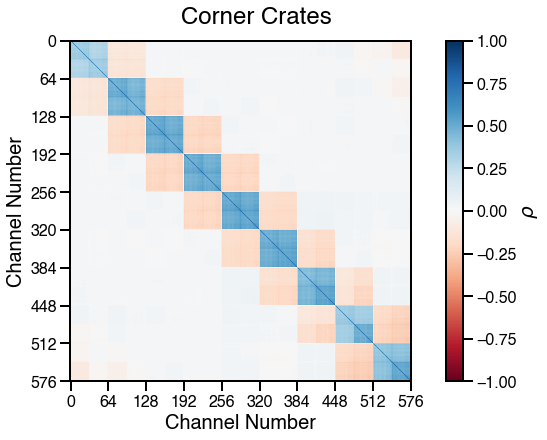

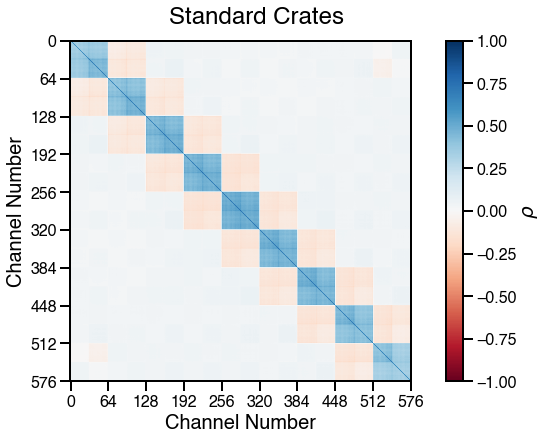

In [9]:
# Comparison of correlation matrices between data and MC.
data[0].plot_correlation_matrix('all')
data[0].plot_correlation_matrix('ind1')
data[0].plot_correlation_matrix('corner')
data[0].plot_correlation_matrix('standard')

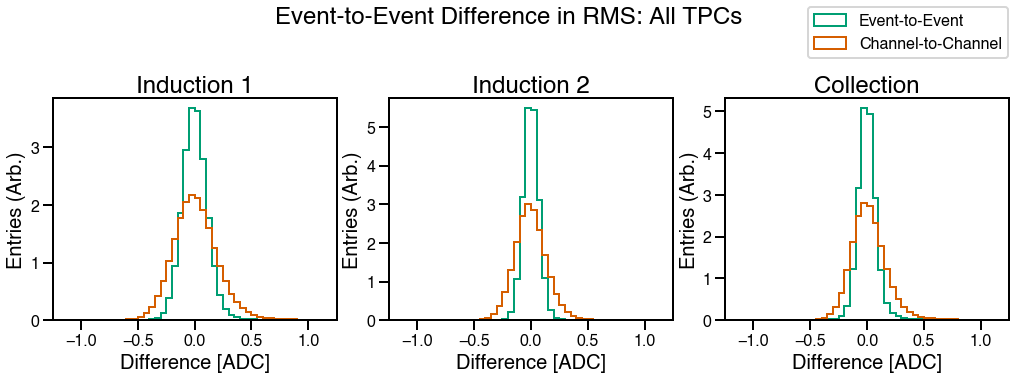

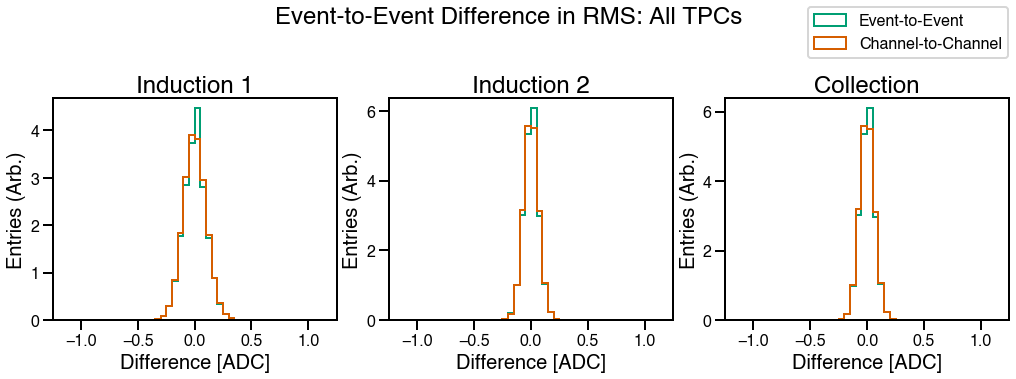

In [10]:
# Comparison of event-to-event and channel-to-channel variations between data and MC.
plot_planes(data[0], 'int_rms', ['e2eabs', 'c2cabs'])
plot_planes(data[1], 'int_rms', ['e2eabs', 'c2cabs'])